In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
%load_ext autoreload
%autoreload 2
import pandas as pd
#import torch
#import torch.nn as nn
#from torch.autograd import Variable
import tensorflow as tf
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from cooc import *
from pickle_vocab import *
from preprocessing_final import pre_process
from helpers import *

### Load data

In [8]:
full_train=load_data()
full_train.sample(5)

,data,target
197553,the grandmother's bible ( leather bound for ma...,:(
155285,dear john has he all teary eyed\n,:(
27907,#np chris brown - i wanna be\n,:)
68671,sleepover with my mia she is two but she is th...,:)
125272,wheres my ipod at\n,:(


### Data pre-processing

In [9]:
full_train.data=pre_process(full_train.data)
full_train.sample(15)

,data,target
176449,handbook otoacoustic emissions ( singular audi...,:(
109348,i check out is getting negative painful hopef...,:(
180791,transcend 16 gb positive compact flash card 6...,:(
5737,positive perfect softball weather !,:)
180377,omg so jelous anyone met today london wish was...,:(
9455,positive love positive fans ! all positive b...,:)
26530,morning twitter #tooearlyforme x,:)
103746,ill i am going sit listening 1d watchin 1d ica...,:(
61175,shiddd still looked positive good ) ),:)
178210,lol is positive good as he used be,:(


### Data exploration

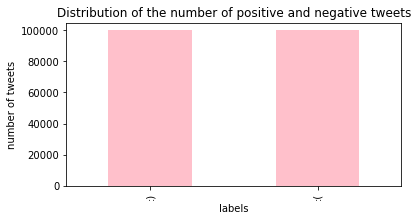

In [10]:
full_train['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 3))
plt.title("Distribution of the number of positive and negative tweets")
plt.ylabel("number of tweets")
plt.xlabel("labels")
plt.show()

The number of tweets per label (positive or negative) is the same. 
Let's visualize basic statistics:

In [11]:
full_train.groupby('target').describe()

data                                                                
         count unique                                                top  freq
target                                                                        
:(      100000  90925                       just wrote ( tell what think   335
:)      100000  89892  positive love  positive fans ! all  positive b...  1556

As already stated above, there is the same number of positive and negative tweets (100'000). In both sets, we have some duplicated tweets as the number of unique tweets for **:(** and for **:)** labels is inferior to 100'000 and it seems that there are more duplicates for the **:)** label. Moreover, the two tweets (one per label) that are the most frequent, have frequency of 335 for **:(** and 1536 for **:)**.  

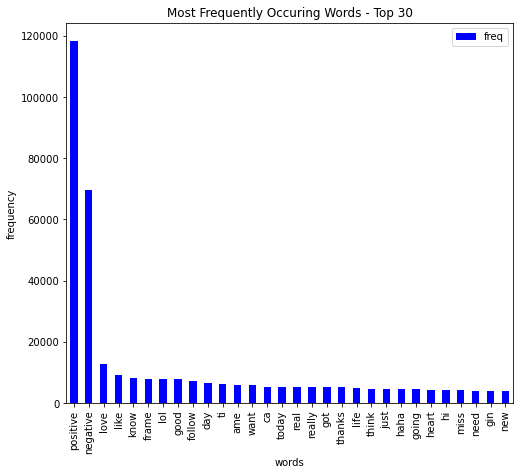

In [12]:
##Let's have a look at the words
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(full_train.data)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(8, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

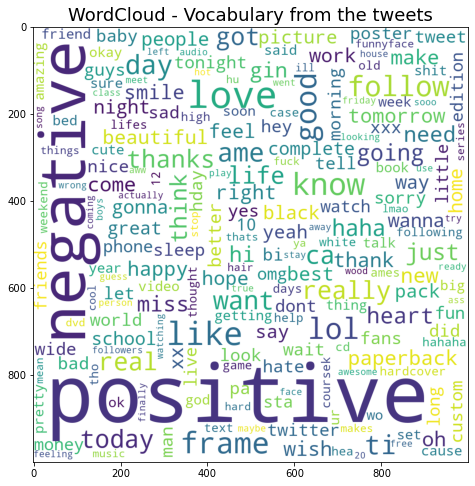

In [13]:
## wordcloud visualization

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from the tweets", fontsize = 18)
plt.show()

The most frequent words, being 'positive' and 'negative' because of the emphasize function (in pre_process), we remove them to check which are the 'real' most frequent words.

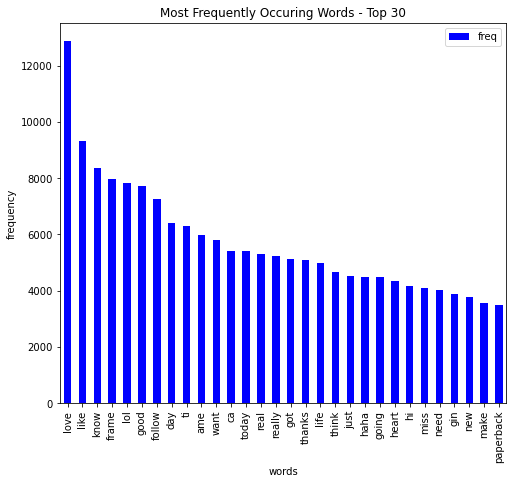

In [14]:
## remove 'positive' and 'negative'

df_visualization=full_train['data'].replace(['positive', 'negative'], '',regex=True)
words = cv.fit_transform(df_visualization)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(8, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

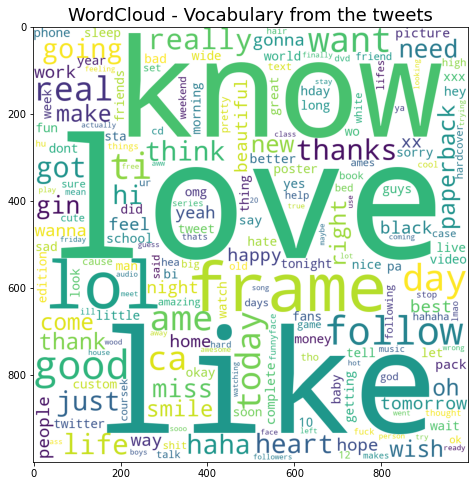

In [15]:
## wordcloud visualization
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from the tweets", fontsize = 18)
plt.show()

From this second visualization, we can see that the most frequent words are:
'love', 'lol', 'frame', 'like', 'know'...

#### Split the data

We split the data to train our models: 
- training data corresponds to 75% of the full dataset (full_train) 
- test data corresponds to 25% of the full dataset

In [16]:
train , test=train_test_split(full_train)
train.reset_index(inplace=True)
test.reset_index(inplace=True)

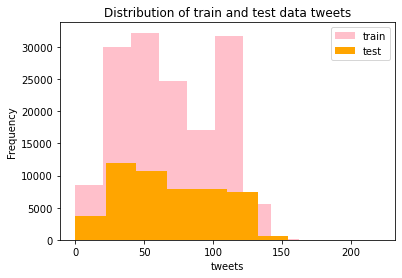

In [7]:
## visualization of the train and test data proportions
length_train = train['data'].str.len().plot.hist( color = 'pink', figsize = (6, 4), label="train")
length_test = test['data'].str.len().plot.hist(test, color = 'orange', figsize = (6, 4), label="test")
plt.legend(loc='upper right')
plt.xlabel("tweets")
plt.title("Distribution of train and test data tweets")
plt.xlim([-5,190])
plt.show()

As expected, knowing the percentage used to split the data, the frequencies for tweets in the training dataset are way higher than for the tweets in the test dataset.

## Embedding matrix generated with glove_template 

By the use of the following command, we created the embedding matrix containing in 'embeddings.npy':
- build_vocab.sh
- cut_vocab.sh
- python3 pickle_vocab.py
- python3 cooc.py
- glove_solution.py

In [17]:
#loading the embeddings
embedding = np.load('embeddings.npy')
embedding

array([[ 0.14205962,  0.18065308, -0.59707358, ...,  0.11122289,
        -0.3996204 , -0.07684434],
       [ 0.20156825,  0.25765782, -0.74777565, ...,  0.11841265,
        -0.49990884, -0.06274457],
       [ 0.23885284,  0.23563671, -0.88665867, ...,  0.17813218,
        -0.54149148, -0.09626553],
       ...,
       [ 1.02610453,  0.01232929,  0.61215281, ...,  0.55733637,
        -1.02616071,  0.48671472],
       [-1.26676919,  1.17572176, -0.45754138, ..., -1.2803609 ,
        -0.31948779, -0.8750009 ],
       [-1.13319243,  0.76661069, -0.80099514, ..., -0.99269073,
         1.37497309, -1.54028131]])

In [18]:
#Associate embedding with vocab words: 
vocab = pickle.load(open('vocab.pkl', "rb")) #this file was generated by executing vocab.sh
word_embedding = {}
for key in vocab.keys():
    word_embedding[key] = embedding[vocab.get(key)] #keys in this dict are not encoded 

In [19]:
word_embedding_ = pd.DataFrame(word_embedding).T
word_embedding_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
<user>,0.142060,0.180653,-0.597074,0.107424,-0.109419,0.362307,0.388570,0.209220,-0.201623,-0.087574,0.319521,0.339559,0.233919,0.053866,0.134681,-0.312904,-0.204372,0.111223,-0.399620,-0.076844
!,0.201568,0.257658,-0.747776,0.131550,-0.124964,0.488308,0.492275,0.277165,-0.253994,-0.118913,0.386144,0.390608,0.298506,0.055792,0.196397,-0.423093,-0.323860,0.118413,-0.499909,-0.062745
i,0.238853,0.235637,-0.886659,0.137024,-0.136336,0.539398,0.563205,0.299993,-0.309439,-0.151941,0.474274,0.430644,0.320344,0.082772,0.212950,-0.431264,-0.331706,0.178132,-0.541491,-0.096266
the,0.130046,0.164172,-0.539436,0.081422,-0.115358,0.346475,0.323468,0.201023,-0.168746,-0.103513,0.279440,0.244223,0.205507,0.039568,0.160183,-0.288688,-0.172304,0.115245,-0.340737,-0.068904
.,0.161507,0.178203,-0.677781,0.108642,-0.098384,0.413938,0.446160,0.247648,-0.233491,-0.092993,0.384231,0.356973,0.227143,0.048145,0.135391,-0.312342,-0.236935,0.126915,-0.394896,-0.067515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#24,1.227720,0.579513,-2.342988,0.067716,1.887846,0.307757,-1.141217,0.169917,-1.512983,-0.984647,0.295459,0.715269,0.419201,-0.709521,0.834665,0.734758,0.127676,1.132830,-0.058477,-1.381742
#20,0.999332,-2.119324,-1.089696,0.831637,-0.149304,0.697253,-0.836633,0.189492,0.470407,-0.460470,-0.477985,-0.977953,1.029165,-2.403820,-0.075742,0.153101,0.616580,-0.342977,0.441204,-0.574883
#1dsongconcept,1.026105,0.012329,0.612153,-1.269533,-0.760138,0.793649,0.399102,0.859880,-0.298815,0.841978,-1.424659,0.184410,-0.362435,-0.188243,1.008235,-0.096033,-0.800237,0.557336,-1.026161,0.486715
#18,-1.266769,1.175722,-0.457541,-0.646836,-1.019695,2.360475,0.472858,-2.041092,-2.587089,1.101651,-0.799423,0.473816,-2.090640,-0.111123,-0.517042,-1.904858,0.618097,-1.280361,-0.319488,-0.875001


In [21]:
## takes the average for each word of train dataframe thanks to the embedding matrix with the vocabulary list
avg_word_vectors = average_word_vectors(train.data ,word_embedding_)
avg_word_vectors_df = pd.DataFrame(avg_word_vectors)
avg_word_vectors_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.239730,0.131996,-0.489585,0.283384,-0.067268,0.393470,0.267505,0.346411,-0.302251,0.232282,0.607084,0.217777,0.541322,0.106909,0.257719,-0.333844,0.030328,0.300341,-0.369793,0.037718
1,-0.010584,0.219944,-0.959552,-0.133153,-0.250146,0.217553,0.397470,0.293365,-0.132725,-0.102683,0.310435,0.307108,0.251670,-0.171518,0.139667,-0.306090,-0.102124,0.223006,-0.407775,0.069831
2,-0.149523,0.034622,-0.342151,0.343346,-0.106282,0.320419,0.262530,-0.127463,-0.067620,0.059821,0.413788,0.130254,0.321398,0.244260,0.116987,-0.591579,-0.139393,-0.117382,-0.291419,-0.158564
3,1.480392,0.520675,0.294501,0.052777,0.559615,0.224624,0.566569,0.720146,-1.150595,-0.984246,1.081680,0.038605,-0.185362,0.195305,-0.045861,-0.051376,0.148646,-0.443615,0.323145,0.422400
4,0.388678,0.185913,-0.540670,0.461253,-0.208614,0.422464,0.655682,0.070670,-0.579070,-0.226837,0.019015,-0.174666,0.009569,0.022873,-0.203816,-0.287106,-0.258512,-0.080162,-0.789063,0.097304


In [22]:
#Associate tweets with the average word vectors of each tweet
sample_train_word_vectors= train.join(avg_word_vectors_df)
sample_train_word_vectors.head(5)

,index,data,target,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
0,2284,sta ed songing you see freind - mayday parade ...,:),0.239730,0.131996,-0.489585,0.283384,-0.067268,0.393470,0.267505,...,0.607084,0.217777,0.541322,0.106909,0.257719,-0.333844,0.030328,0.300341,-0.369793,0.037718
1,136682,lmao think injured arm straightening hair last...,:(,-0.010584,0.219944,-0.959552,-0.133153,-0.250146,0.217553,0.397470,...,0.310435,0.307108,0.251670,-0.171518,0.139667,-0.306090,-0.102124,0.223006,-0.407775,0.069831
2,98237,big hoops ( bigger positive better ) - nelly ...,:),-0.149523,0.034622,-0.342151,0.343346,-0.106282,0.320419,0.262530,...,0.413788,0.130254,0.321398,0.244260,0.116987,-0.591579,-0.139393,-0.117382,-0.291419,-0.158564
3,108916,ooo alik karistirdi resmenn,:(,1.480392,0.520675,0.294501,0.052777,0.559615,0.224624,0.566569,...,1.081680,0.038605,-0.185362,0.195305,-0.045861,-0.051376,0.148646,-0.443615,0.323145,0.422400
4,42667,thanks hussein positive appreciate,:),0.388678,0.185913,-0.540670,0.461253,-0.208614,0.422464,0.655682,...,0.019015,-0.174666,0.009569,0.022873,-0.203816,-0.287106,-0.258512,-0.080162,-0.789063,0.097304


In [23]:
## we are only interested in the weights to further train the models
X_train = sample_train_word_vectors.drop(columns=["data","target","index"])

In [24]:
## we are only interested in the labels
Y_train = sample_train_word_vectors.target

In [25]:
## let's do the same for the test data
avg_word_vectors_test_df = pd.DataFrame(average_word_vectors(test.data ,word_embedding_))

In [26]:
## same as for the training data
sample_test_word_vectors=test.join(avg_word_vectors_test_df)
X_test = sample_test_word_vectors.drop(columns=["data","target", "index"])
Y_test = sample_test_word_vectors.target

## Training models with glove 

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#### Logistic Regression

In [28]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.64036
Validation Accuracy : 0.64136
[[15402  9576]
 [ 8356 16666]]


#### SVM

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_clf_svm = Pipeline([('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, Y_train)
predicted_svm = text_clf_svm.predict(X_test)
print("accuracy of the SVM:", np.mean(predicted_svm == Y_test))

accuracy of the SVM: 0.64428


In [ ]:
#convert smiley to +1, -1
Y_train_tr=transform_smiley(Y_train)
Y_test_tr= transform_smiley(Y_test)

#### Random Forest

In [73]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train_tr)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train_tr))
print("Validation Accuracy :", model.score(X_test, Y_test_tr))

Training Accuracy : 0.9980133333333333
Validation Accuracy : 0.64034


### Neuron Networks

**with keras**

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import PReLU
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import Constant
from keras.constraints import maxnorm
from keras.backend import clear_session

# works on arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [81]:
#cleaning to avoid stucked information
clear_session()

In [82]:
#Neural network predict either 0 or 1 not -1/1 so just changing all -1 values to 0.
Y_train_nn=Y_train_tr

for i in range(len(Y_train_tr)):
    if (Y_train_tr[i]==-1):
        Y_train_nn[i]=0

In [85]:
Y_train_nn=np.array(Y_train_nn)

In [87]:
np.random.seed(13)

model_d2v_02 = Sequential()
model_d2v_02.add(Dense(500, activation='relu', input_dim=20, kernel_constraint=maxnorm(3)))
model_d2v_02.add(Dense(500, activation='relu'))
model_d2v_02.add(Dense(1, activation='sigmoid'))

model_d2v_02.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_d2v_02.fit(X_train, Y_train_nn,
                 validation_split=0.1, shuffle=True,
                 epochs=20, batch_size=100, verbose=1)

Epoch 1/20
1350/1350 [==============================] - 12s 9ms/step - loss: 0.6238 - accuracy: 0.6545 - val_loss: 0.6078 - val_accuracy: 0.6697
Epoch 2/20
1350/1350 [==============================] - 12s 9ms/step - loss: 0.6044 - accuracy: 0.6725 - val_loss: 0.6012 - val_accuracy: 0.6723
Epoch 3/20
1350/1350 [==============================] - 10s 8ms/step - loss: 0.5965 - accuracy: 0.6782 - val_loss: 0.6094 - val_accuracy: 0.6639
Epoch 4/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.5910 - accuracy: 0.6819 - val_loss: 0.5925 - val_accuracy: 0.6782
Epoch 5/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.5859 - accuracy: 0.6857 - val_loss: 0.5933 - val_accuracy: 0.6733
Epoch 6/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.5810 - accuracy: 0.6892 - val_loss: 0.5917 - val_accuracy: 0.6753
Epoch 7/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.5753 - accuracy: 0.6939 - val_loss: 0.5905 - val_ac

In [88]:
predictions=model_d2v_02.predict(X_test)

In [90]:
#converting back 0 predictions to smileys
real_pred=[]

for i in range(len(predictions)):
    if (predictions[i]<0.5):
        real_pred.append(':(')
    if (predictions[i]>=0.5):
        real_pred.append(':)')


In [91]:
print("accuracy is:",np.mean(real_pred==Y_test))

0.68258

**with LSTM**

In [ ]:
## transform smileys of Y_train into -1 or 1:
Y=[]
for y in Y_train:
    if (y==':)'):
        Y.append(1)
    elif (y==':('):
        Y.append(-1)

In [ ]:
Y_train=Y
Y_train

In [ ]:
## for Y_test
Y=[]
for y in Y_test:
    if (y==':)'):
        Y.append(1)
    elif (y==':('):
        Y.append(-1)

In [ ]:
Y_test=Y
Y_test

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_size=X_train.shape[0]
test_size=X_test.shape[0]

dataX = Variable(torch.Tensor(np.array(pd.concat([X_train, X_test]))))
dataY = Variable(torch.Tensor(np.array(Y_train+Y_test)))

trainX = Variable(torch.Tensor(np.array(X_train)))
trainY = Variable(torch.Tensor(np.array(Y_train)))

testX = Variable(torch.Tensor(np.array(X_test)))
testY = Variable(torch.Tensor(np.array(Y_test)))

input_size=dataX.shape[1]
size_tmp=trainX.shape[0]
trainX

In [ ]:
batch_size=1
#size_tmp=trainX.shape[0]
#seq_length=int(size_tmp/batch_size)
#dataX=dataX.reshape(batch_size,20,200000)
#dataX.shape
#trainX=trainX.reshape(1,20,150000)
trainX=trainX.reshape(batch_size,150000,20)
#testX=testY.reshape(1,20,50000)
###tester aussi dataX=dataX.reshape(1,200000,20)
trainY=trainY.reshape(150000,1)
##############testtttterrrrr :  trainY=trainY.reshape(seq_length,1)
#trainY=trainY.reshape(1,150000)
#trainY=trainY.reshape(150000)

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        #self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            #num_layers=num_layers, 150000, 1, batch_first=True)
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
#####TRAINING:

num_epochs = 5 ###add a zero
learning_rate = 0.01

input_size = 20
hidden_size = 32
num_layers = 1
seq_length=seq_length
num_classes = 2

#lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

## Create submission

Submissions on AlCrowd are made with the test dataset provided.

In [31]:
with open('twitter-datasets/test_data.txt') as f:
    real_test = f.readlines()
real_test={'data':real_test}
real_test=pd.DataFrame(real_test)

**test data pre-processing:**

In [32]:
real_test.data=pre_process(real_test.data)
real_test.sample(15)

,data
7780,7781 negative damn thats lil min am waitin yu...
2231,2232 hiphouse and lauhaus gets 9/10
3682,3683 is bi hday
2102,2103 know boys positive adorable
9427,9428 jose mean me
2216,2217 pioneer avic-z 2 30gb negative hard driv...
5588,5589 not every walma it example one haha
8438,8439 of stayed home positive like mommy said ...
8949,8950 must fu from negative smoke that maybe i...
2765,2766 ti ame next week be o2 london


In [ ]:
# creation of the weight matrix
avg_real_test_df = pd.DataFrame(average_word_vectors(real_test.data ,word_embedding_))
sample_real_test_word_vectors= real_test.join(avg_real_test_df)
X_real_test = sample_real_test_word_vectors.drop(columns=["data"])

In [359]:
import re
ids=[]   
for i in range (len(real_test)):
    text=real_test.data[i]
    found=re.findall('\d+', text )
    ids.append(found[0])


In [380]:
OUTPUT_PATH = 'sample_submission.csv' 
create_csv_submission(ids, real_pred, OUTPUT_PATH)